# Linear Regression from scratch

## Importing the libraries

In [203]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Reading the csv file

### Given area of the house in 1000m^2 and price in 1000$

In [221]:
data = pd.read_csv("Price_Predection.csv")

In [222]:
data.head()

,area(1000m2),price(1000$)
0,2.5,550
1,2.7,550
2,3.0,565
3,3.2,610
4,3.4,640


## Splitting the data into X and y

In [223]:
X = data["area(1000m2)"]
y = data["price(1000$)"]

In [224]:
X

0    2.5
1    2.7
2    3.0
3    3.2
4    3.4
5    3.6
6    3.8
7    4.0
Name: area(1000m2), dtype: float64

In [225]:
y

0    550
1    550
2    565
3    610
4    640
5    680
6    700
7    725
Name: price(1000$), dtype: int64

## Plotting the variables

Text(0, 0.5, 'price of the house')

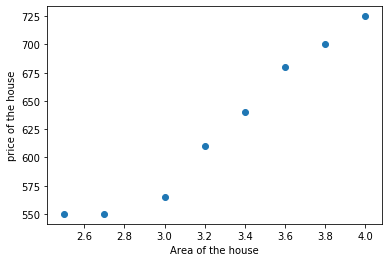

In [226]:
plt.scatter(X,y)
plt.xlabel("Area of the house")
plt.ylabel("price of the house")

In [227]:
m=len(X) # length of the training example

- We add another dimension to our data to accommodate the (bias)  intercept term so that it will be easy for vectorization.

In [228]:
X = np.stack([np.ones(m), X],axis = 1)

In [229]:
X

array([[1. , 2.5],
       [1. , 2.7],
       [1. , 3. ],
       [1. , 3.2],
       [1. , 3.4],
       [1. , 3.6],
       [1. , 3.8],
       [1. , 4. ]])

## Cost Function

The objective of linear regression is to minimize the cost function

$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^m \left( h_{\theta}(x^{(i)}) - y^{(i)}\right)^2$$

where the hypothesis $h_\theta(x)$ is given by the linear model
$$ h_\theta(x) = \theta^Tx = \theta_0 + \theta_1 x_1$$

here 
- $\theta_0$ represents bias(intercept term) and
- $\theta_1$ represents weight(slope term)


In [231]:
def computeCost(X,y,theta):
    m = y.size
    J = 0
    #vectorized Implementation
    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))

    return J

## Gradient Descent

The objective of linear regression is to minimize the cost function

$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^m \left( h_{\theta}(x^{(i)}) - y^{(i)}\right)^2$$

where the hypothesis $h_\theta(x)$ is given by the linear model
$$ h_\theta(x) = \theta^Tx = \theta_0 + \theta_1 x_1$$

here 
- $\theta_0$ represents bias(intercept term) and
- $\theta_1$ represents weight(slope term)

These are the values you will adjust to minimize cost $J(\theta)$.

$$ \theta_j = \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m \left( h_\theta(x^{(i)}) - y^{(i)}\right)x_j^{(i)} \qquad \text{simultaneously update } \theta_j \text{ for all } j$$

With each step of gradient descent, your parameters $\theta_j$ come closer to the optimal values that will achieve the lowest cost J($\theta$).



In [197]:
def gradientDescent(X, y, theta, alpha, num_iters):

    m = y.size
    theta = theta.copy()  
    J_history = []
    
    for i in range(num_iters):
        #Vectorized Implementation 
        theta = theta - (alpha / m) * np.dot((np.dot(X, theta) - y),X)
        J_history.append(computeCost(X, y, theta))    
    return theta, J_history

## Linear Regression Model

In [232]:
#initialiing theta to zeros
theta = np.zeros(2)

iterations = 100
alpha = 0.01

theta, J_history = gradientDescent(X ,y, theta, alpha, iterations)

In [234]:
theta #our bias and weight term

array([ 55.29787745, 173.8013216 ])

## Predictions on new data

In [235]:
np.dot([1,2.5],theta)

489.80118144372824

## Plotting our model

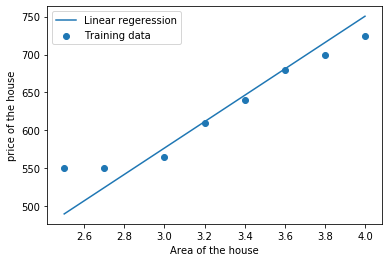

In [237]:
plt.scatter(X[:,1],y)
plt.xlabel("Area of the house")
plt.ylabel("price of the house")
plt.plot(X[:, 1], np.dot(X, theta))
plt.legend(['Linear regeression', 'Training data']);

## Visualizing our cost function

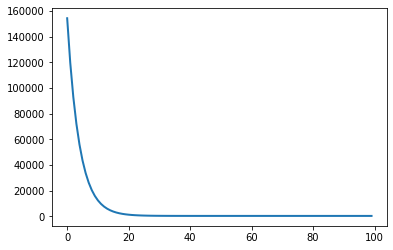

In [238]:
plt.plot(np.arange(len(J_history)), J_history, lw=2)